#### Import Libraries

In [194]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#### Load DataSet

In [143]:
# Load DataSet
train=pd.read_csv("HousePrices/train.csv")
test=pd.read_csv("HousePrices/test.csv")

#### Step 1: EDA

In [144]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [145]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [146]:
# Exploratory dataset
train.shape

(1460, 81)

In [147]:
test.shape

(1459, 80)

In [148]:
train.drop(["Id"],axis=1,inplace=True)

In [150]:
# check % of missing value
train.apply(lambda x: np.round(100*x.isnull().sum()/train.shape[0],4))

MSSubClass        0.0000
MSZoning          0.0000
LotFrontage      17.7397
LotArea           0.0000
Street            0.0000
                  ...   
MoSold            0.0000
YrSold            0.0000
SaleType          0.0000
SaleCondition     0.0000
SalePrice         0.0000
Length: 80, dtype: float64

In [151]:
train_null= train.isnull().sum()
train_null_percentage = train.apply(lambda x: np.round(100*x.isnull().sum()/train.shape[0],4))
train_null_new=pd.DataFrame([train_null,train_null_percentage]).T
train_null_new.columns=['NullValues','NullPer']
train_null_new.sort_values(by='NullValues',ascending=False,inplace=True)
train_null_new.reset_index(inplace=True)
train_null_new.head(20)

,index,NullValues,NullPer
0,PoolQC,1453.0,99.5205
1,MiscFeature,1406.0,96.3014
2,Alley,1369.0,93.7671
3,Fence,1179.0,80.7534
4,FireplaceQu,690.0,47.2603
5,LotFrontage,259.0,17.7397
6,GarageYrBlt,81.0,5.5479
7,GarageCond,81.0,5.5479
8,GarageType,81.0,5.5479
9,GarageFinish,81.0,5.5479


In [152]:
# Dropping the columns more than 50% of missing values.
train=train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [153]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [154]:
train_null= train.isnull().sum()
train_null_percentage = train.apply(lambda x: np.round(100*x.isnull().sum()/train.shape[0],4))
train_null_new=pd.DataFrame([train_null,train_null_percentage]).T
train_null_new.columns=['NullValues','NullPer']
train_null_new.sort_values(by='NullValues',ascending=False,inplace=True)
train_null_new.reset_index(inplace=True)
train_null_new.head(20)

,index,NullValues,NullPer
0,LotFrontage,259.0,17.7397
1,GarageType,81.0,5.5479
2,GarageYrBlt,81.0,5.5479
3,GarageFinish,81.0,5.5479
4,GarageQual,81.0,5.5479
5,GarageCond,81.0,5.5479
6,BsmtFinType2,38.0,2.6027
7,BsmtExposure,38.0,2.6027
8,BsmtQual,37.0,2.5342
9,BsmtCond,37.0,2.5342


In [156]:
# Fetch all missing column names 
train_null_new[:14]['index']

0      LotFrontage
1       GarageType
2      GarageYrBlt
3     GarageFinish
4       GarageQual
5       GarageCond
6     BsmtFinType2
7     BsmtExposure
8         BsmtQual
9         BsmtCond
10    BsmtFinType1
11      MasVnrArea
12      MasVnrType
13      Electrical
Name: index, dtype: object

In [157]:
nullColumns = np.array(train_null_new[:14]['index'])
nullColumns

array(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [158]:
for column in nullColumns:
    if train[column].dtype=='object':
        train[column].fillna(train[column].mode()[0],inplace=True)
    else:
        train[column].fillna(train[column].median(),inplace=True)

In [159]:
train_null=train.isnull().sum()
train_null=pd.DataFrame(train_null,columns=['number']).sort_values(by='number',ascending=False)
train_null.reset_index(inplace=True)
train_null.head(5)

,index,number
0,MSSubClass,0
1,GarageYrBlt,0
2,Fireplaces,0
3,Functional,0
4,TotRmsAbvGrd,0


#### View the categorical values

In [54]:
# get the object column names
object_columns=train.select_dtypes(include='object').columns
object_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [55]:
for column in object_columns:
    print(f"Column is : {column}")
    print(train[column].value_counts())
    print("========\n")

Column is : MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Column is : Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Column is : LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Column is : LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Column is : Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Column is : LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Column is : LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Column is : Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU      

#### Outlier Treatment

In [160]:
def Outlier_Detection(data,columns,method,capValue=False):
    for column in columns:
        if "SD" in method:
            #Dropping the outlier rows with standard deviation
            factor = 3
            upper_lim = data[column].mean () + data[column].std () * factor
            lower_lim = data[column].mean () - data[column].std () * factor
            print(f"The upper limit for {column} is found to be {upper_lim}.")
            print(f"The lower limit for {column} is found to be {lower_lim}.")

            data = data[(data[column] < upper_lim) & (data[column] > lower_lim)]

            if capValue==True:
                data.loc[(data[column] > upper_lim),column] = upper_lim
                data.loc[(data[column] < lower_lim),column] = lower_lim
        if "Percentile" in method:
            upper_lim = data[column].quantile(.95)
            lower_lim = data[column].quantile(.05)
            data = data[(data[column] < upper_lim) & (data[column] > lower_lim)]
            print(f"The upper limit for {column} is found to be {upper_lim}.")
            print(f"The lower limit for {column} is found to be {lower_lim}.")

            if capValue==True:
                data.loc[(data[column] > upper_lim),column] = upper_lim
                data.loc[(data[column] < lower_lim),column] = lower_lim

    return data

In [161]:
# Check for any null value
[features for features in train.columns if train[features].isnull().sum()>0]

[]

In [163]:
numerical_columns=train.select_dtypes(include=np.number).columns
len(numerical_columns)

37

In [164]:
numerical_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

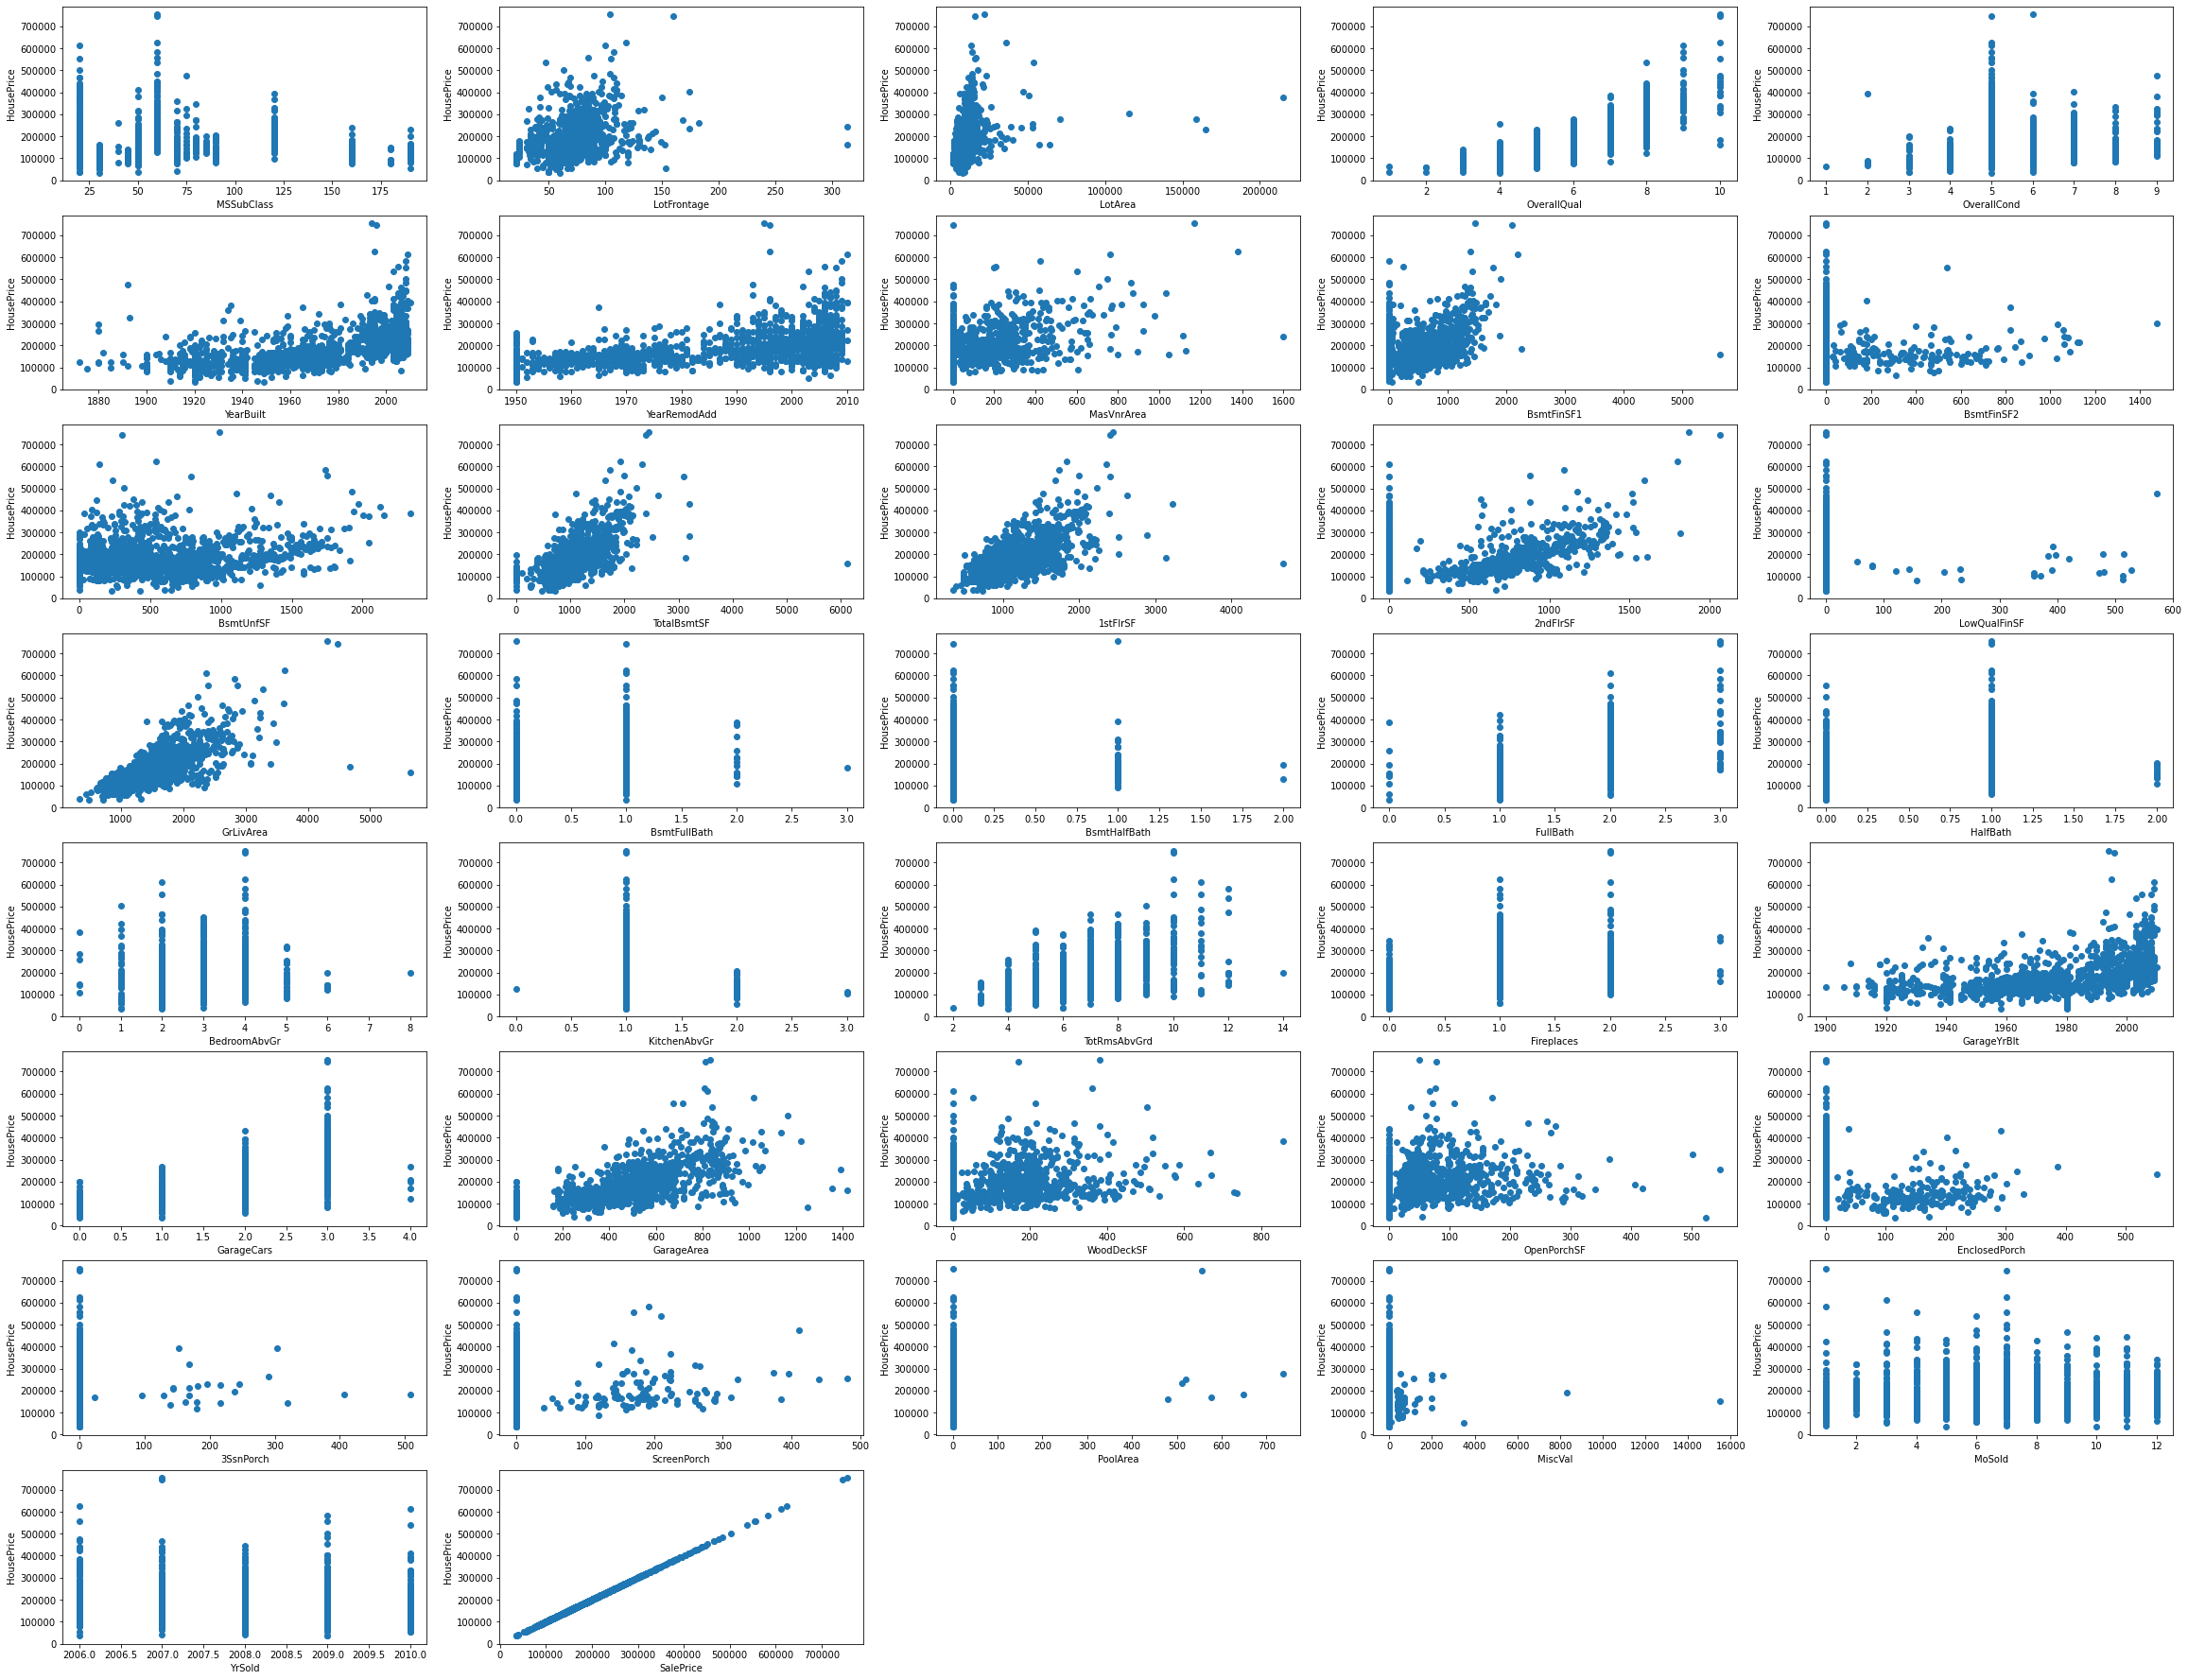

In [165]:
j=0
plt.figure(figsize=(40,40))
for column in numerical_columns:
    plt.subplot(10, 5, j+1)
    plt.scatter(train[column],train['SalePrice'])
    # plt.title('how FullBath effect in SalePrice')
    plt.xlabel(column)
    plt.ylabel('HousePrice')
    j+=1
# plt.show()

In [167]:
descriateCols=[]
continuesCols=[]
for column in numerical_columns:
    #print(train[column].nunique())
    if train[column].nunique()>20:
        continuesCols.append(column)
    else:
        descriateCols.append(column)

In [168]:
descriateCols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

In [169]:
continuesCols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

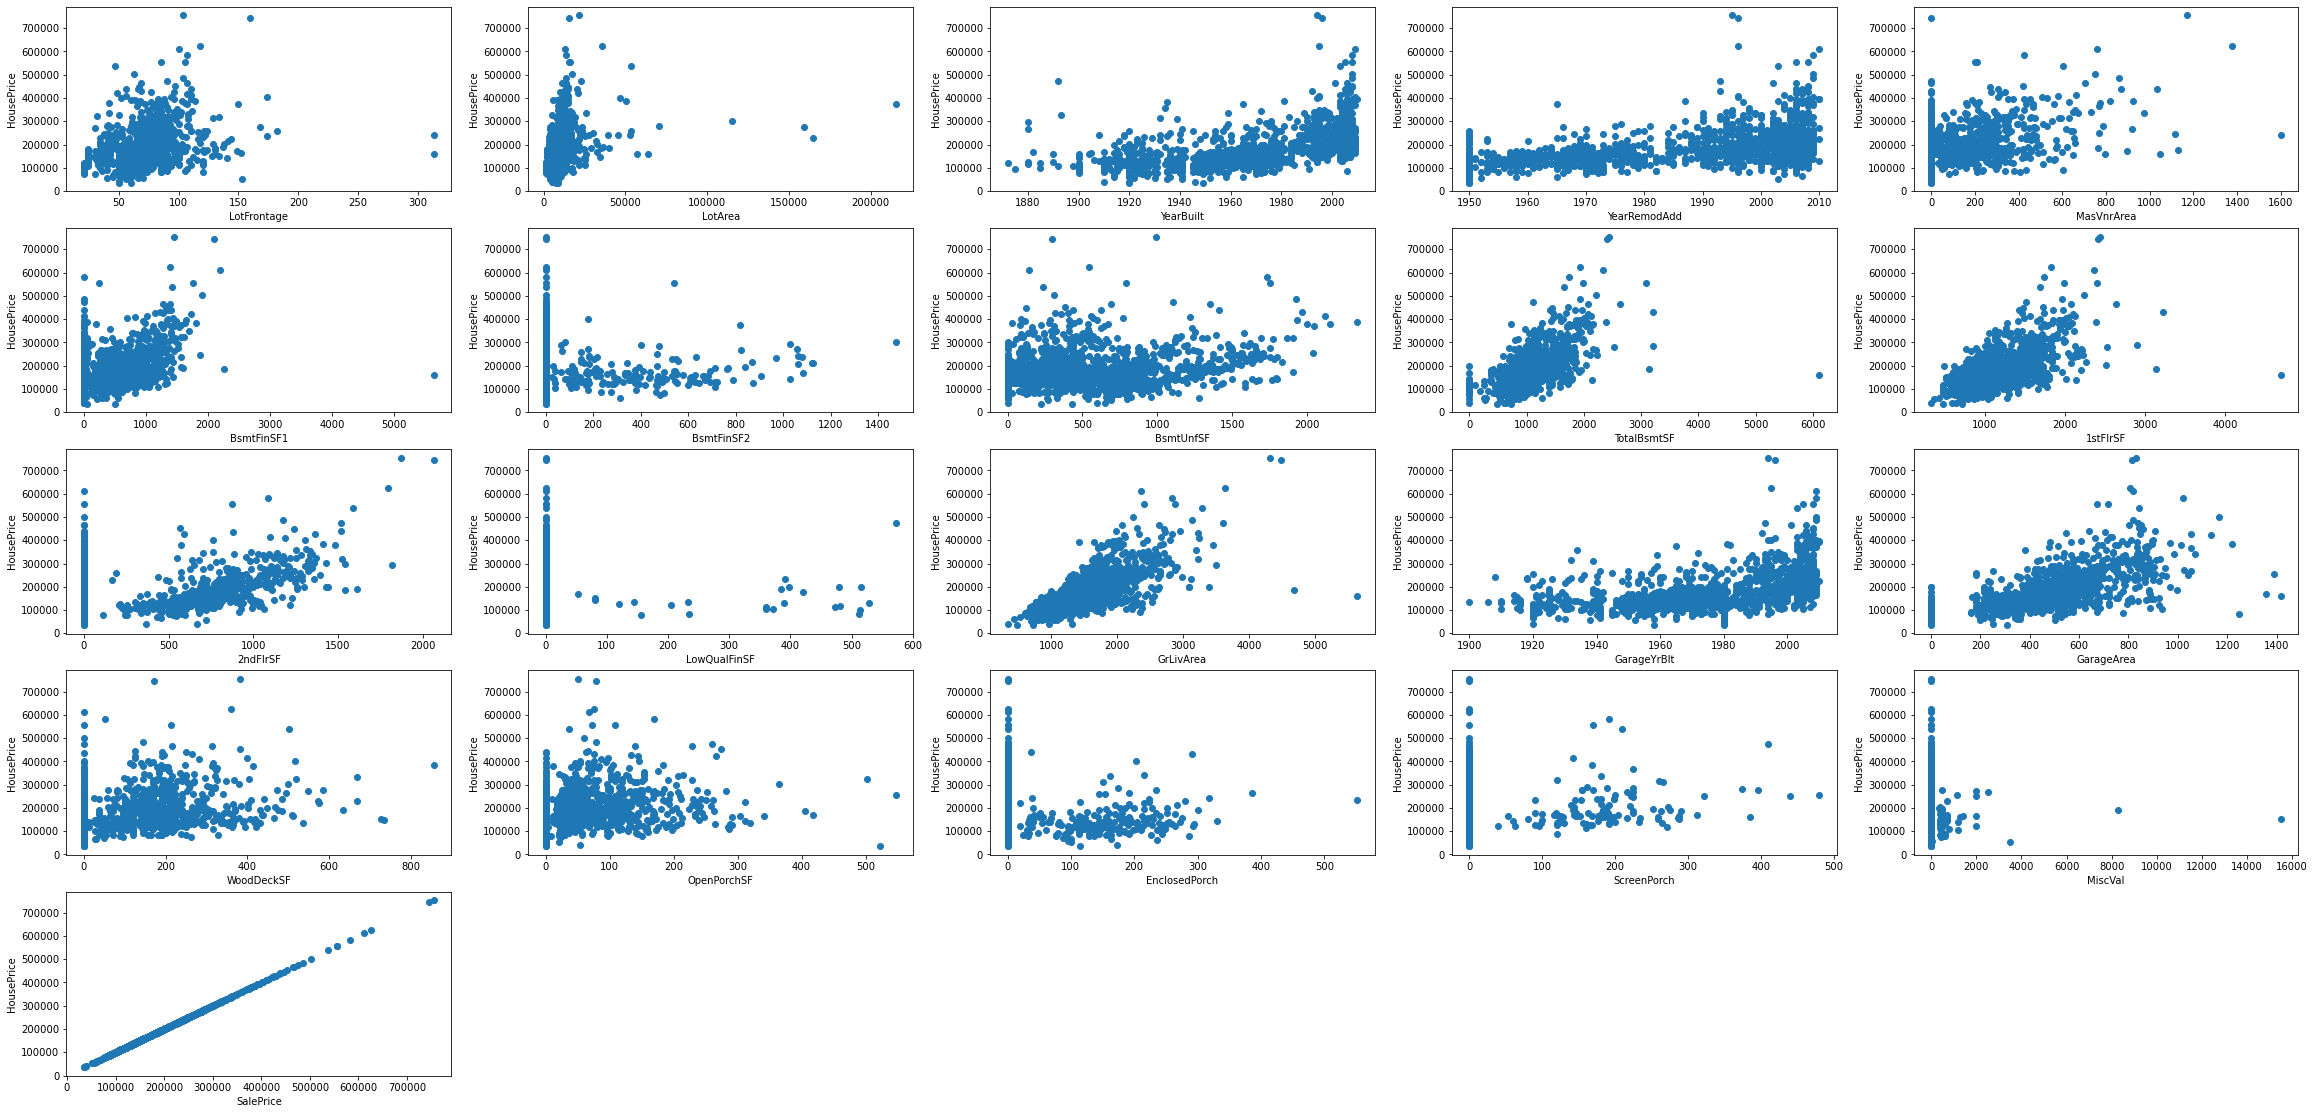

In [170]:
j=0
plt.figure(figsize=(40,40))
for column in continuesCols:
    plt.subplot(10, 5, j+1)
    plt.scatter(train[column],train['SalePrice'])
    # plt.title('how FullBath effect in SalePrice')
    plt.xlabel(column)
    plt.ylabel('HousePrice')
    j+=1
# plt.show()

In [171]:
continuesCols.remove("SalePrice")
continuesCols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal']

In [172]:
trainOut = Outlier_Detection(train,columns=continuesCols,method="SD",capValue=True)

The upper limit for LotFrontage is found to be 135.9467298969942.
The lower limit for LotFrontage is found to be 3.780667363279747.
The upper limit for LotArea is found to be 35107.161824618655.
The lower limit for LotArea is found to be -14583.44575813666.
The upper limit for YearBuilt is found to be 2062.101498611751.
The lower limit for YearBuilt is found to be 1880.4573249176606.
The upper limit for YearRemodAdd is found to be 2046.7762848167629.
The lower limit for YearRemodAdd is found to be 1922.7314507669219.
The upper limit for MasVnrArea is found to be 627.8130486349093.
The lower limit for MasVnrArea is found to be -425.00573499215255.
The upper limit for BsmtFinSF1 is found to be 1668.9395790520382.
The lower limit for BsmtFinSF1 is found to be -819.5165574693044.
The upper limit for BsmtFinSF2 is found to be 523.5914288492825.
The lower limit for BsmtFinSF2 is found to be -432.25857582334584.
The upper limit for BsmtUnfSF is found to be 1889.0787410617718.
The lower limit 

C:\Users\dell pc\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\dell pc\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)



The lower limit for OpenPorchSF is found to be -146.38664626460098.
The upper limit for EnclosedPorch is found to be 194.55813984462503.
The lower limit for EnclosedPorch is found to be -152.2924278318963.
The upper limit for ScreenPorch is found to be 174.9855941973962.
The lower limit for ScreenPorch is found to be -146.19351498947543.
The upper limit for MiscVal is found to be 1688.4374156221606.
The lower limit for MiscVal is found to be -1596.857020093356.


In [173]:
trainOut


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0,0.0,0,0.0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0,0.0,0,0.0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0,0.0,0,0.0,9,2008,WD,Normal,223500
4,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0,0.0,0,0.0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,320,0.0,0,700.0,10,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180,RM,35.0,3675.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0,0.0,0,0.0,5,2006,WD,Normal,145000
1453,20,RL,90.0,17217.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0,0.0,0,0.0,7,2006,WD,Abnorml,84500
1454,20,FV,62.0,7500.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0,0.0,0,0.0,10,2009,WD,Normal,185000
1455,60,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0,0.0,0,0.0,8,2007,WD,Normal,175000


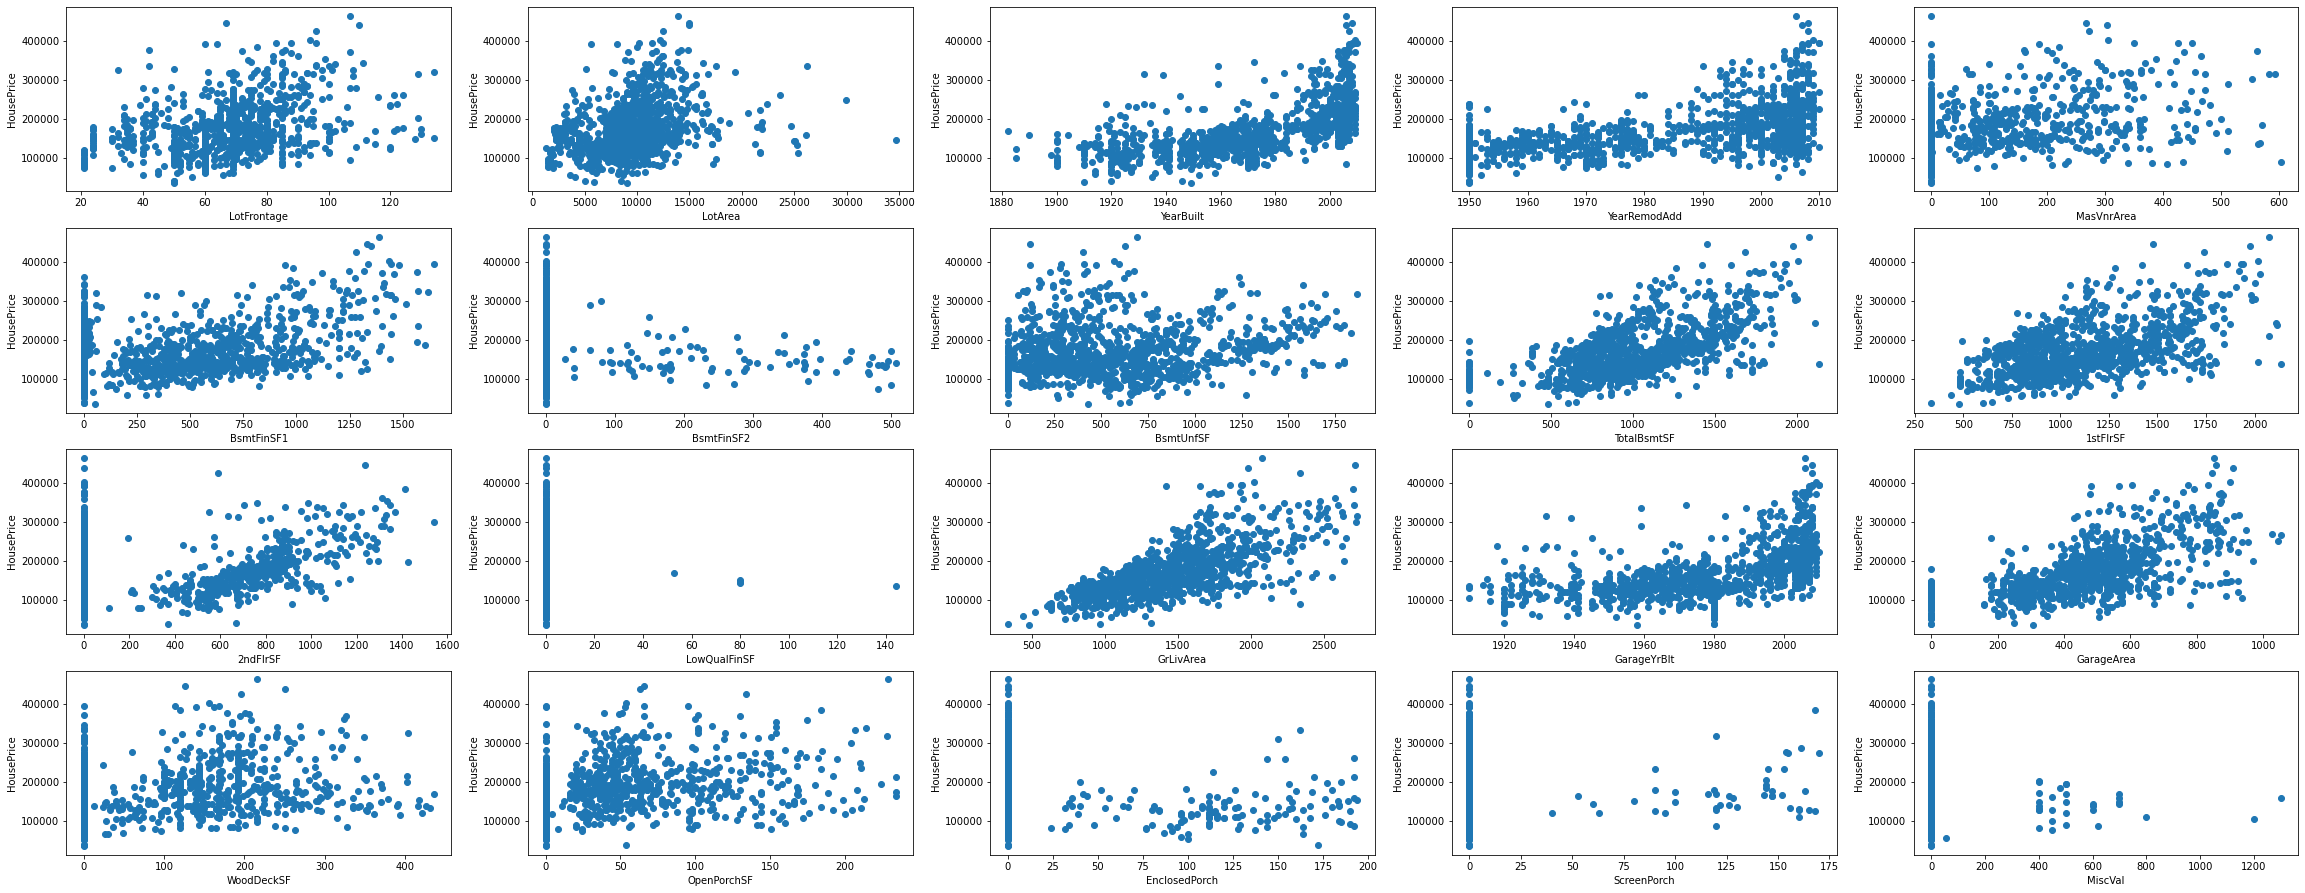

In [174]:
j=0
plt.figure(figsize=(40,40))
for column in continuesCols:
    plt.subplot(10, 5, j+1)
    plt.scatter(trainOut[column],trainOut['SalePrice'])
    # plt.title('how FullBath effect in SalePrice')
    plt.xlabel(column)
    plt.ylabel('HousePrice')
    j+=1
# plt.show()

In [141]:


# fig, axes =plt.subplots(10,5, figsize=(30, 30))

# for i,icol in enumerate(object_columns):
#     sns.catplot(x=icol, y="SalePrice", data=trainOut,kind = 'box',height = 4,aspect=1.5,ax=axes[i % 2])


In [193]:
# def bar_chart(col):
#     HousePrice=trainOut.groupby([col])['SalePrice'].mean()
#     df_HousePrice=pd.DataFrame(HousePrice).sort_values(by=['SalePrice'],ascending=False)
#     df_HousePrice.reset_index(inplace=True)
#     plt.bar(x=df_HousePrice[col],height=df_HousePrice['SalePrice'])
#     plt.title(f'house price effect ber {col}')
#     plt.xlabel(col)
#     plt.ylabel('Price')


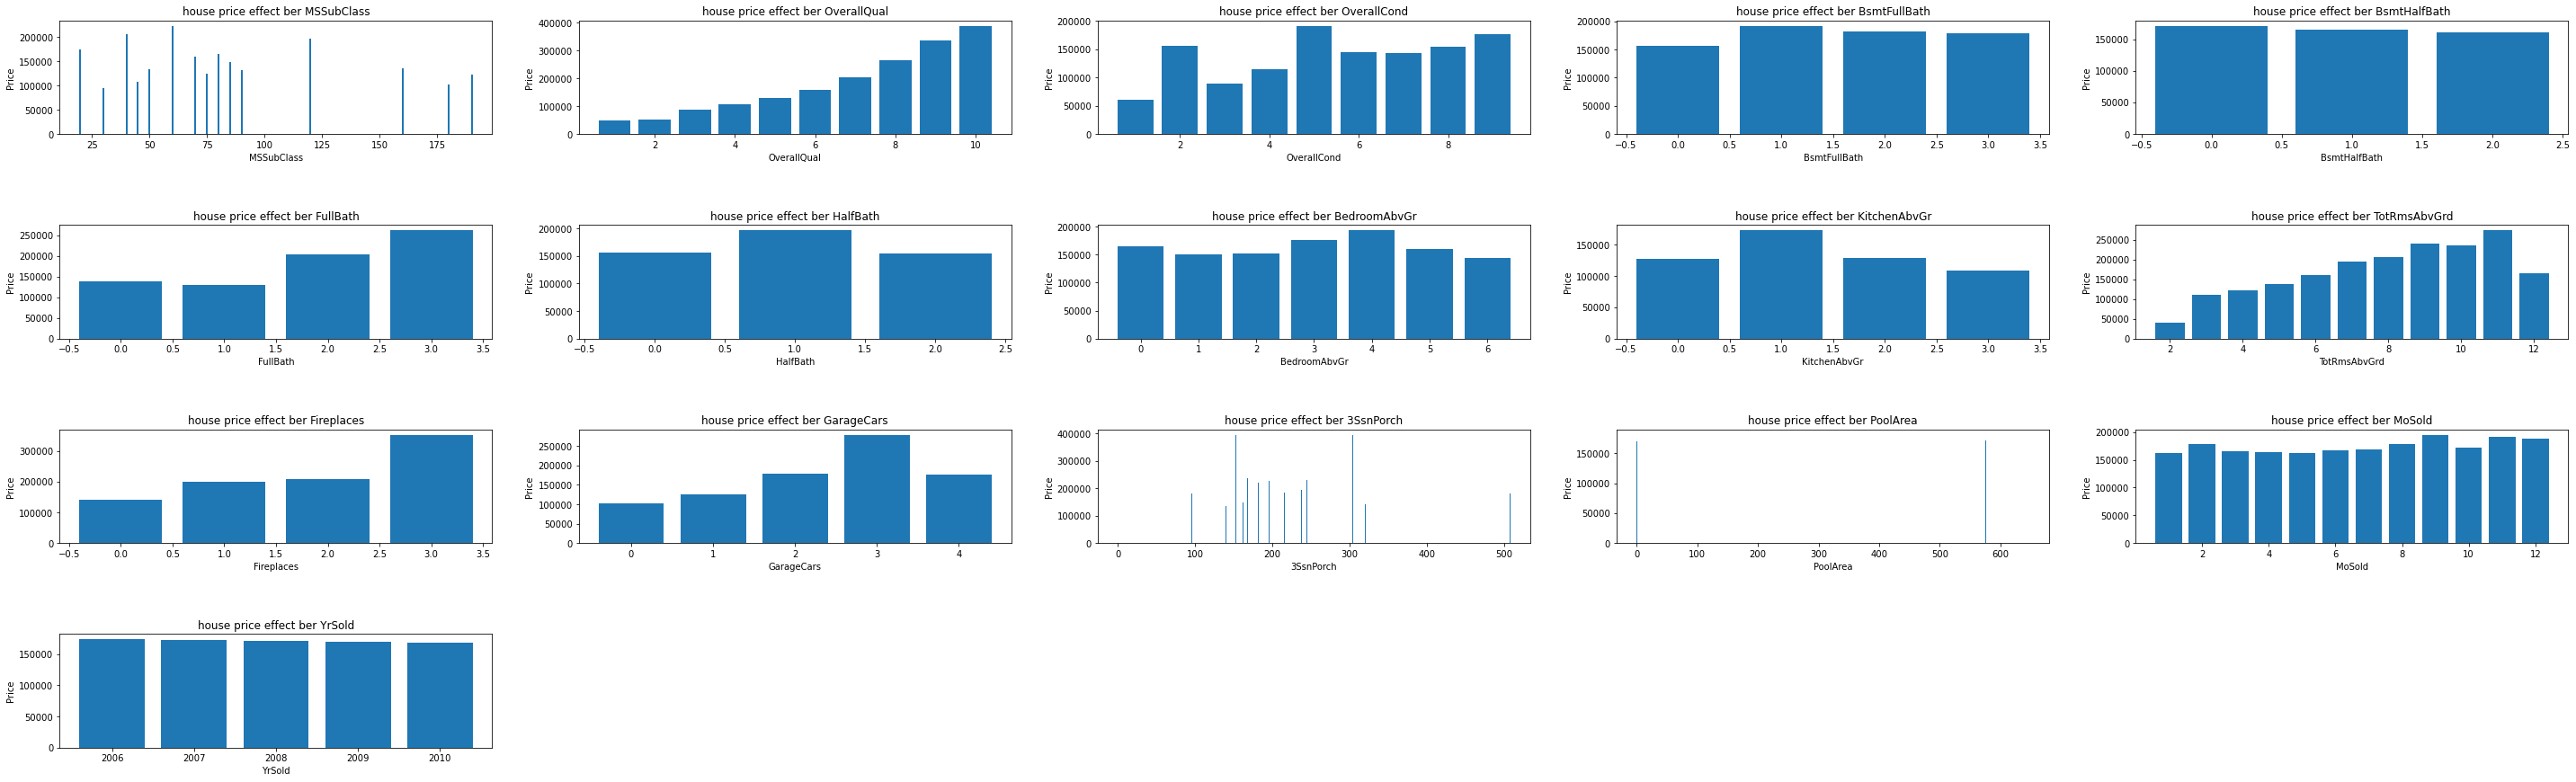

In [191]:
j=0
plt.figure(figsize=(50,40))
plt.subplots_adjust(hspace=0.8)
for col in descriateCols:
    plt.subplot(10, 5, j+1)
    HousePrice=trainOut.groupby([col])['SalePrice'].mean()
    df_HousePrice=pd.DataFrame(HousePrice).sort_values(by=['SalePrice'],ascending=False)
    df_HousePrice.reset_index(inplace=True)
    plt.bar(x=df_HousePrice[col],height=df_HousePrice['SalePrice'])
    plt.title(f'house price effect ber {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    j+=1


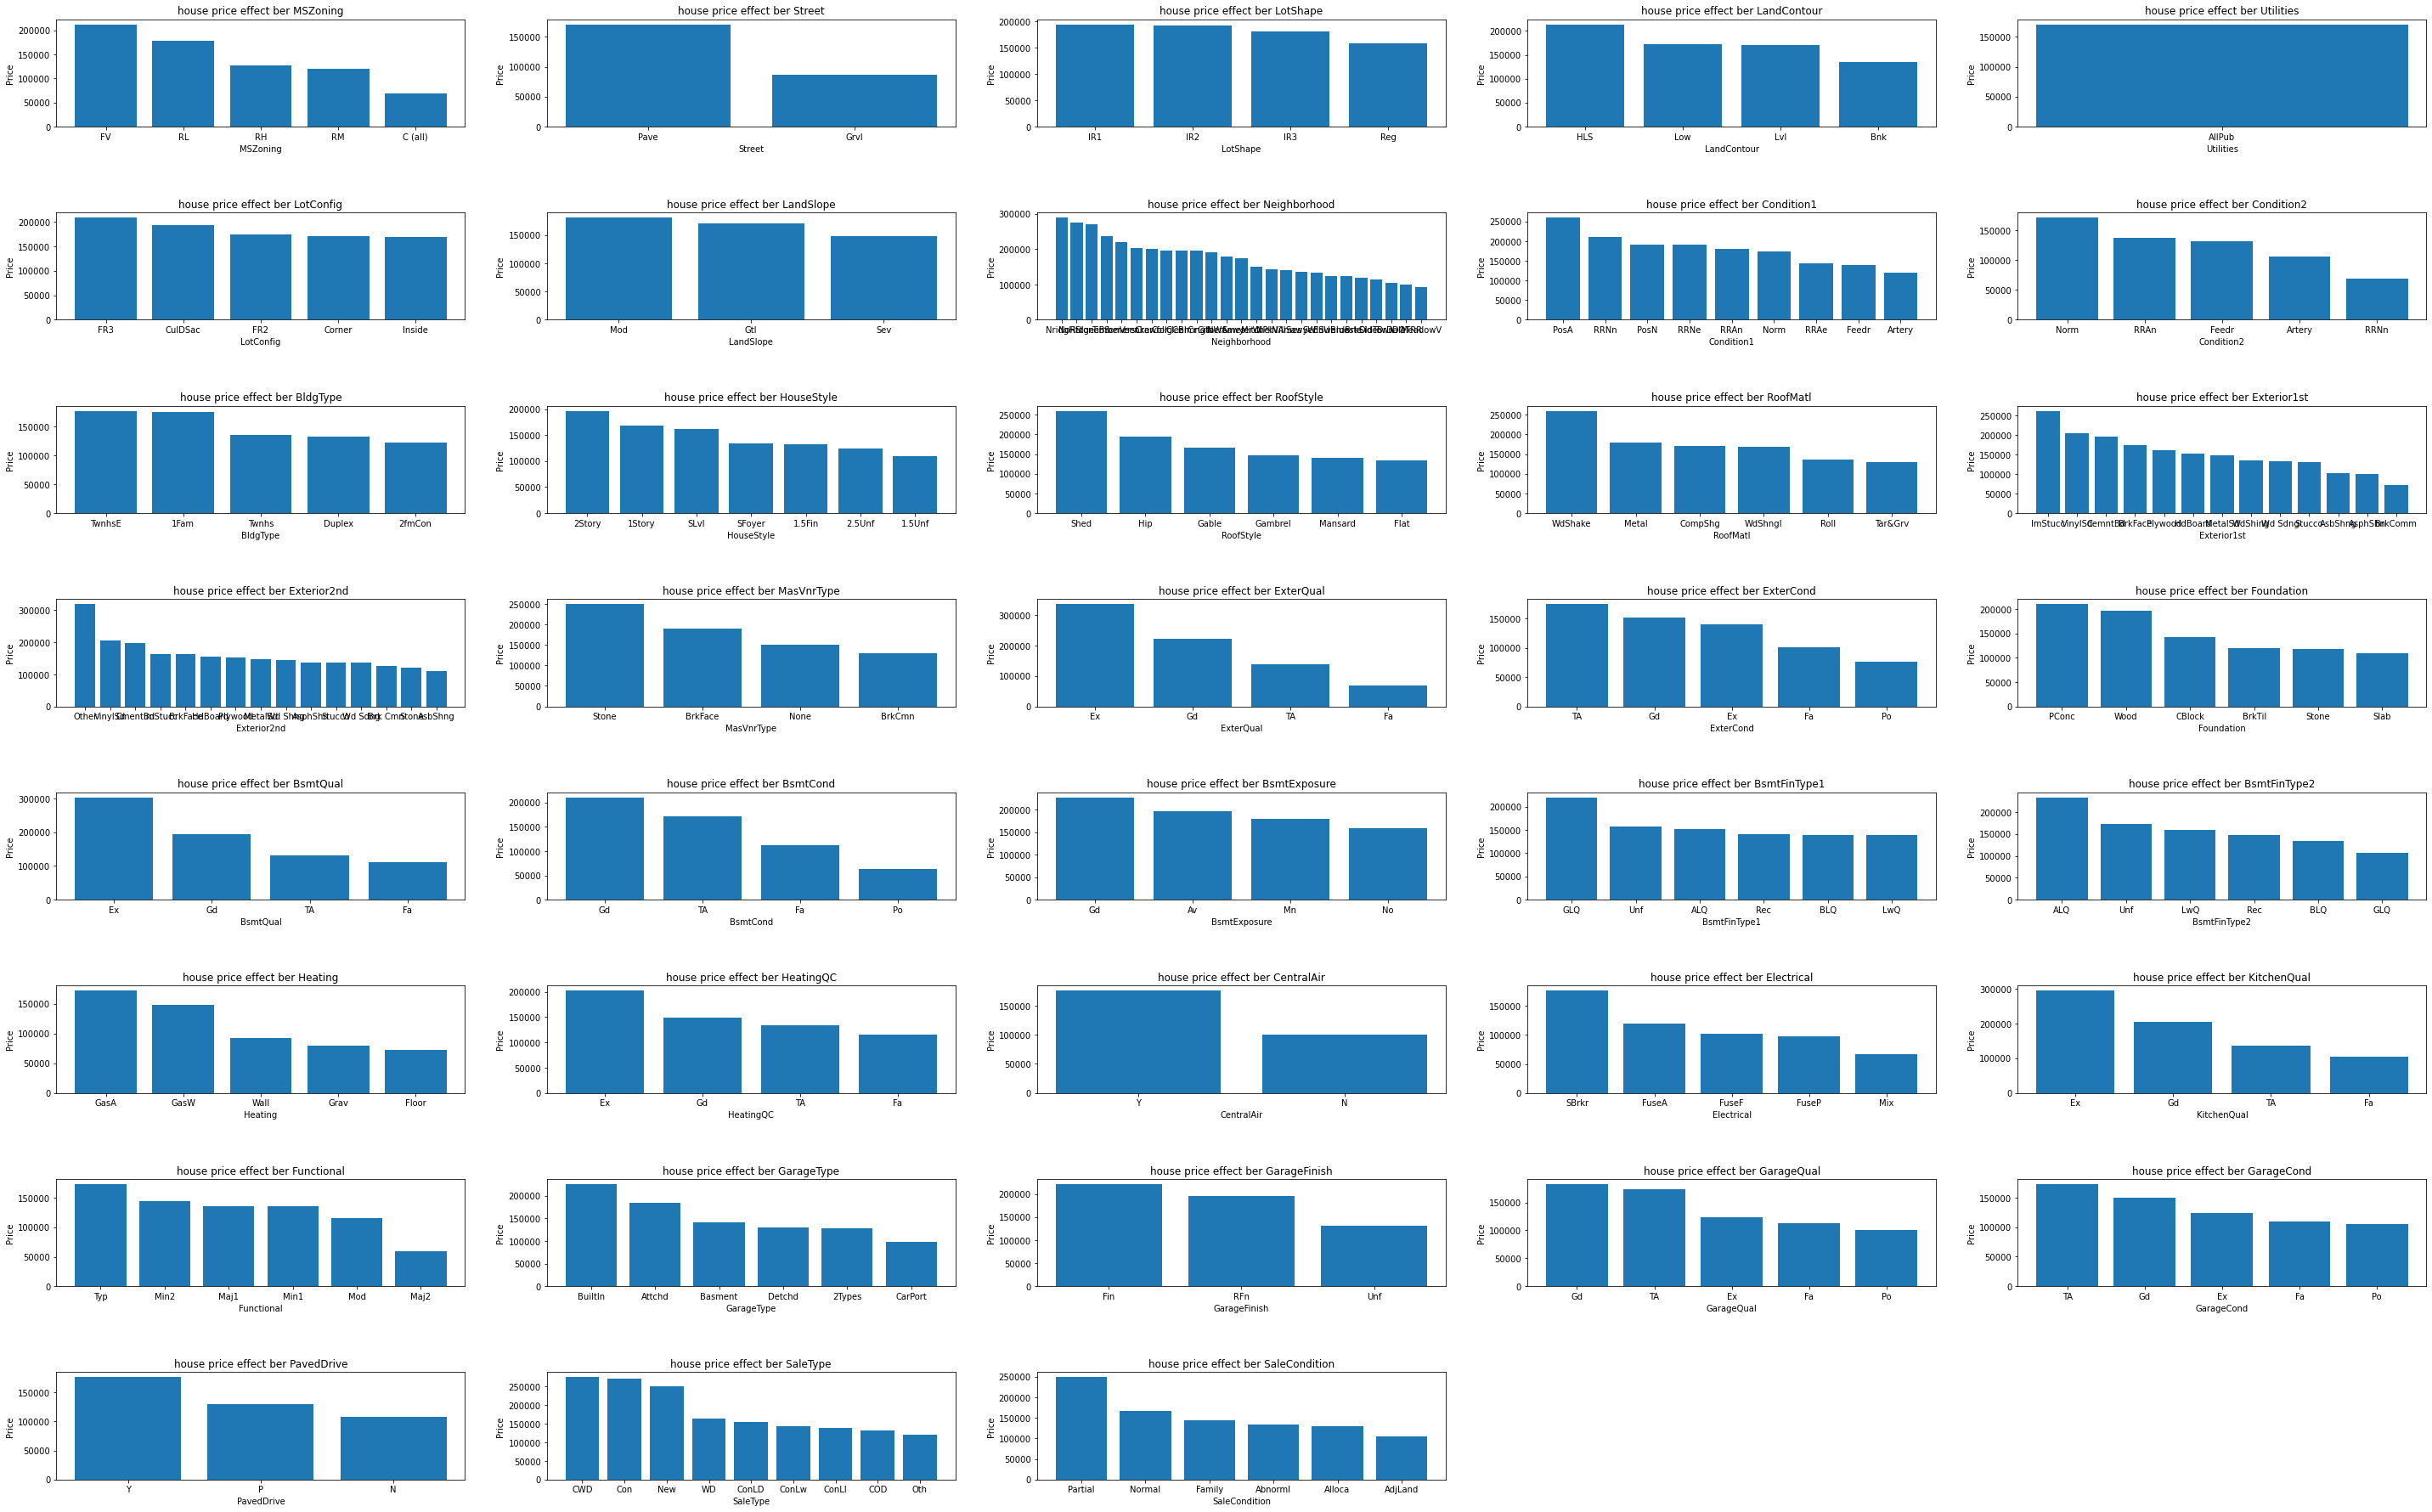

In [192]:

j=0
plt.figure(figsize=(50,40))
plt.subplots_adjust(hspace=0.8)
for col in object_columns:
    plt.subplot(10, 5, j+1)
    HousePrice=trainOut.groupby([col])['SalePrice'].mean()
    df_HousePrice=pd.DataFrame(HousePrice).sort_values(by=['SalePrice'],ascending=False)
    df_HousePrice.reset_index(inplace=True)
    plt.bar(x=df_HousePrice[col],height=df_HousePrice['SalePrice'])
    plt.title(f'house price effect ber {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    j+=1

In [1]:
#anomalous_features = df.iloc[:,1:29].columns
import matplotlib.gridspec as gridspec

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(continuesCols):
    ax = plt.subplot(gs[i])
    sns.distplot(trainOut[cn][trainOut.Class == 1], bins=50)
    sns.distplot(trainOut[cn][trainOut.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

NameError: name 'plt' is not defined

#### Categorical Features

In [ ]:
def categorical_encoding(data,columns,targetColumn,encodingType,approach):

    if encodingType=="NominalEncoding":
        if "OneHotEncoding" in approach:
            for column in columns:
                data_new = pd.get_dummies(data[column],drop_first=True)
                data = pd.concat([data,data_new],axis=1)
                data.drop(column,axis=1,inplace=True)
        if "OneHotEncodingWithManycatergories" in approach:
            for column in columns:
                lst_10=list(data[column].value_counts().sort_values(ascending=False).head(10).index)
                for categories in lst_10:
                    data[categories]=np.where(data[column]==categories,1,0)
        if "MeanEncoding" in approach:
            for column in columns:
                mean_ordinal=data.groupby([column])[targetColumn].mean().to_dict()
                data[column]=data[column].map(mean_ordinal)

In [196]:
from collections import defaultdict
d=defaultdict(LabelEncoder)

# Encoding the variable
fit = train.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
#fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
# df.apply(lambda x: d[x.name].transform(x))

In [198]:
fit

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,36,327,1,3,3,0,4,0,...,0,0,0,0,0,1,2,8,4,412
1,0,3,51,498,1,3,3,0,2,0,...,0,0,0,0,0,4,1,8,4,339
2,5,3,39,702,1,0,3,0,4,0,...,0,0,0,0,0,8,2,8,4,442
3,6,3,31,489,1,0,3,0,0,0,...,108,0,0,0,0,1,0,8,0,194
4,5,3,55,925,1,0,3,0,2,0,...,0,0,0,0,0,11,2,8,4,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,33,267,1,3,3,0,4,0,...,0,0,0,0,0,7,1,8,4,314
1456,0,3,56,866,1,3,3,0,4,0,...,0,0,0,0,0,1,4,8,4,415
1457,6,3,37,415,1,3,3,0,4,0,...,0,0,0,0,17,4,4,8,4,527
1458,0,3,39,505,1,3,3,0,4,0,...,38,0,0,0,0,3,4,8,4,199


In [200]:
d["LotShape"].transform(["Reg"])

array([3])

#### Corrlation Matrix

In [116]:
trainOut.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1156.0,733.261246,420.695965,1.0,376.75,736.0,1094.25,1457.0
MSSubClass,1156.0,57.417820,42.737163,20.0,20.00,50.0,70.00,190.0
LotFrontage,1156.0,67.524221,18.130607,21.0,60.00,69.0,76.00,134.0
LotArea,1156.0,9291.907439,3768.020772,1300.0,7239.75,9120.0,11056.25,34650.0
OverallQual,1156.0,6.001730,1.334847,1.0,5.00,6.0,7.00,10.0
OverallCond,1156.0,5.541522,1.104500,1.0,5.00,5.0,6.00,9.0
YearBuilt,1156.0,1973.300173,29.193827,1882.0,1955.00,1976.0,2002.00,2010.0
YearRemodAdd,1156.0,1985.140138,20.810281,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1156.0,82.480969,129.590666,0.0,0.00,0.0,143.00,604.0
BsmtFinSF1,1156.0,425.933391,414.923637,0.0,0.00,387.5,697.25,1646.0


In [117]:
trainOut.describe(include='object').T

,count,unique,top,freq
MSZoning,1156,5,RL,912
Street,1156,2,Pave,1154
LotShape,1156,4,Reg,761
LandContour,1156,4,Lvl,1052
Utilities,1156,1,AllPub,1156
LotConfig,1156,5,Inside,858
LandSlope,1156,3,Gtl,1107
Neighborhood,1156,25,NAmes,175
Condition1,1156,9,Norm,1013
Condition2,1156,5,Norm,1149


In [118]:
c=trainOut.corr()
c

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.019888,-0.030299,0.009608,-0.018610,0.007223,0.003593,-0.018154,-0.029198,0.005307,...,-0.013256,-0.036170,-0.006870,-0.066839,0.028591,0.024425,-0.069194,0.034125,0.008643,-0.024795
MSSubClass,0.019888,1.000000,-0.440420,-0.385251,0.055474,-0.087923,0.070762,0.047724,0.064037,-0.070840,...,-0.017759,0.000060,-0.051107,-0.045256,-0.016909,-0.008933,-0.052245,-0.026903,0.001795,-0.079559
LotFrontage,-0.030299,-0.440420,1.000000,0.568922,0.209637,-0.033169,0.128918,0.062898,0.145957,0.137096,...,0.097964,0.155862,-0.040157,0.104497,0.014134,0.021864,0.030279,0.030212,-0.002114,0.366655
LotArea,0.009608,-0.385251,0.568922,1.000000,0.127437,-0.023628,0.051045,0.010401,0.059292,0.171090,...,0.147540,0.104439,-0.032898,0.082991,0.029857,0.008008,0.035527,0.014064,-0.027267,0.331596
OverallQual,-0.018610,0.055474,0.209637,0.127437,1.000000,-0.096945,0.625166,0.574698,0.360658,0.202399,...,0.249892,0.369764,-0.142505,0.040650,0.001731,-0.000054,-0.067086,0.095251,-0.014413,0.813344
OverallCond,0.007223,-0.087923,-0.033169,-0.023628,-0.096945,1.000000,-0.369790,0.063255,-0.118281,-0.004835,...,-0.013524,-0.066966,0.113595,0.023649,0.062186,0.017258,0.073610,-0.007287,0.051392,-0.106247
YearBuilt,0.003593,0.070762,0.128918,0.051045,0.625166,-0.369790,1.000000,0.640321,0.300561,0.225019,...,0.246821,0.287532,-0.385930,0.029777,-0.081731,0.003007,-0.063361,0.020922,-0.021423,0.616482
YearRemodAdd,-0.018154,0.047724,0.062898,0.010401,0.574698,0.063255,0.640321,1.000000,0.153938,0.108125,...,0.232334,0.296767,-0.176141,0.043760,-0.035225,0.007006,-0.057667,0.029276,0.025308,0.559965
MasVnrArea,-0.029198,0.064037,0.145957,0.059292,0.360658,-0.118281,0.300561,0.153938,1.000000,0.214059,...,0.136765,0.142912,-0.133983,0.057703,0.010774,-0.009647,-0.045975,0.046483,-0.013580,0.399921
BsmtFinSF1,0.005307,-0.070840,0.137096,0.171090,0.202399,-0.004835,0.225019,0.108125,0.214059,1.000000,...,0.215350,0.050395,-0.111447,0.042100,0.045605,0.017106,-0.009021,-0.007962,0.032925,0.393063


<AxesSubplot:>

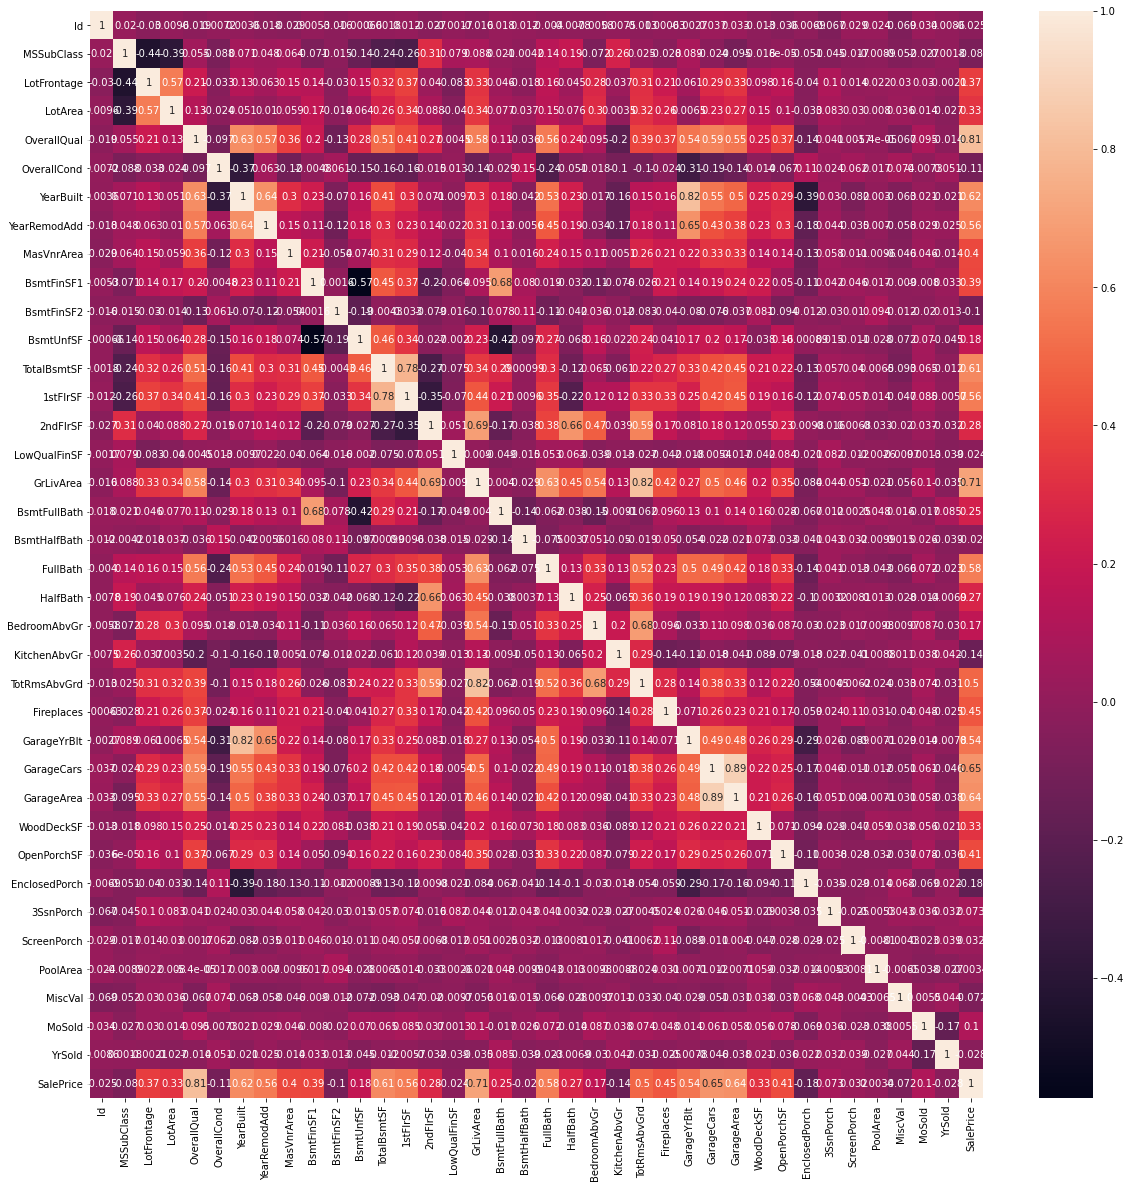

In [119]:
plt.figure(figsize=(20,20))
sns.heatmap(c,annot=True)

In [120]:
# we can choose top 10 columns effect in price without this Correlation above
cor_target= abs(c["SalePrice"].sort_values(ascending=False))

In [122]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

SalePrice       1.000000
OverallQual     0.813344
GrLivArea       0.708742
GarageCars      0.653735
GarageArea      0.640348
YearBuilt       0.616482
TotalBsmtSF     0.609852
FullBath        0.575051
1stFlrSF        0.563997
YearRemodAdd    0.559965
GarageYrBlt     0.541332
TotRmsAbvGrd    0.495849
Fireplaces      0.445730
OpenPorchSF     0.405481
Name: SalePrice, dtype: float64

In [123]:
relevant_features.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'YearBuilt', 'TotalBsmtSF', 'FullBath', '1stFlrSF', 'YearRemodAdd',
       'GarageYrBlt', 'TotRmsAbvGrd', 'Fireplaces', 'OpenPorchSF'],
      dtype='object')

In [124]:
cor_target

SalePrice        1.000000
OverallQual      0.813344
GrLivArea        0.708742
GarageCars       0.653735
GarageArea       0.640348
YearBuilt        0.616482
TotalBsmtSF      0.609852
FullBath         0.575051
1stFlrSF         0.563997
YearRemodAdd     0.559965
GarageYrBlt      0.541332
TotRmsAbvGrd     0.495849
Fireplaces       0.445730
OpenPorchSF      0.405481
MasVnrArea       0.399921
BsmtFinSF1       0.393063
LotFrontage      0.366655
LotArea          0.331596
WoodDeckSF       0.326835
2ndFlrSF         0.284842
HalfBath         0.269469
BsmtFullBath     0.249389
BsmtUnfSF        0.179612
BedroomAbvGr     0.169934
MoSold           0.104035
3SsnPorch        0.072785
ScreenPorch      0.032051
PoolArea         0.003397
BsmtHalfBath     0.019989
LowQualFinSF     0.023823
Id               0.024795
YrSold           0.027859
MiscVal          0.071995
MSSubClass       0.079559
BsmtFinSF2       0.099617
OverallCond      0.106247
KitchenAbvGr     0.142589
EnclosedPorch    0.175231
Name: SalePr